# Section 3: Causal discovery

Python code for practical exercises in the [Causal Data Science with Direct Acyclical Graphs](https://www.udemy.com/course/causal-data-science/) Udemy course by Paul Hunermund

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sn



## Exercise 1: Testable implications of graphs



In [6]:
#We use the causalgraphicalmodels package. 
#See tutorial here: https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb

from causalgraphicalmodels import CausalGraphicalModel

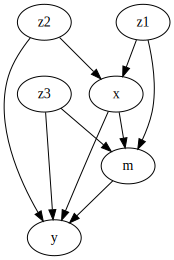

In [7]:
dag = CausalGraphicalModel(nodes=['y','x','m','z1','z2','z3'],
                          edges = [
                              ('x','y'),
                              ('m','y'),
                              ('z2','y'),
                              ('z3','y'),
                              ('x','m'),
                              ('z1','m'),
                              ('z3','m'),
                              ('z1','x'),
                              ('z2','x')
                          ])

dag.draw()

In [8]:
# Find all d-separation relationships in a DAG.
# The first two values in each tuple represent pairs of nodes, the dict represents conditional on
indep_rels = dag.get_all_independence_relationships()

for tup in indep_rels:
    
    if len(tup[2])>0:
        print(f'{tup[0]} and {tup[1]} are d-separated conditional on {", ".join(list(tup[2]))}')
    else:
        print(f'{tup[0]} and {tup[1]} are d-separated')
        

y and z1 are d-separated conditional on m, x, z3, z2
z3 and z2 are d-separated
z3 and z2 are d-separated conditional on x
z3 and z2 are d-separated conditional on z1
z3 and z2 are d-separated conditional on x, z1
z3 and z2 are d-separated conditional on m, x, z1
z3 and x are d-separated
z3 and x are d-separated conditional on z1
z3 and x are d-separated conditional on z2
z3 and x are d-separated conditional on z2, z1
z3 and z1 are d-separated
z3 and z1 are d-separated conditional on x
z3 and z1 are d-separated conditional on z2
z3 and z1 are d-separated conditional on x, z2
z2 and m are d-separated conditional on x, z1
z2 and m are d-separated conditional on x, z3, z1
z2 and z1 are d-separated
z2 and z1 are d-separated conditional on z3


## Exercise 2: PC Algorithm example calculation

In [9]:
#We import various functions to estimate and plot the results of the pcalg algorithm. 
#This includes a plot_graph function

os.chdir('..')
import pingouin as pg

In [10]:
# Simulate data

a = np.random.normal(size=1000)
b = np.random.normal(size=1000)
c = a + np.random.normal(size=1000)
d = a + b + c + np.random.normal(size=1000)
e = np.random.normal(size=1000)

df = pd.DataFrame({l:var for l,var in zip(['a','b','c','d','e'],[a,b,c,d,e])})

df.head()

,a,b,c,d,e
0,1.351490,-1.595365,0.992747,0.838115,0.129265
1,-1.262770,-0.275328,-2.591804,-3.677010,-1.189105
2,-1.132098,0.497356,-1.167732,-1.546038,-0.510470
3,2.268335,0.678593,2.420412,5.875496,0.613739
4,-0.537476,-0.676621,-1.042715,-1.224819,-0.459229


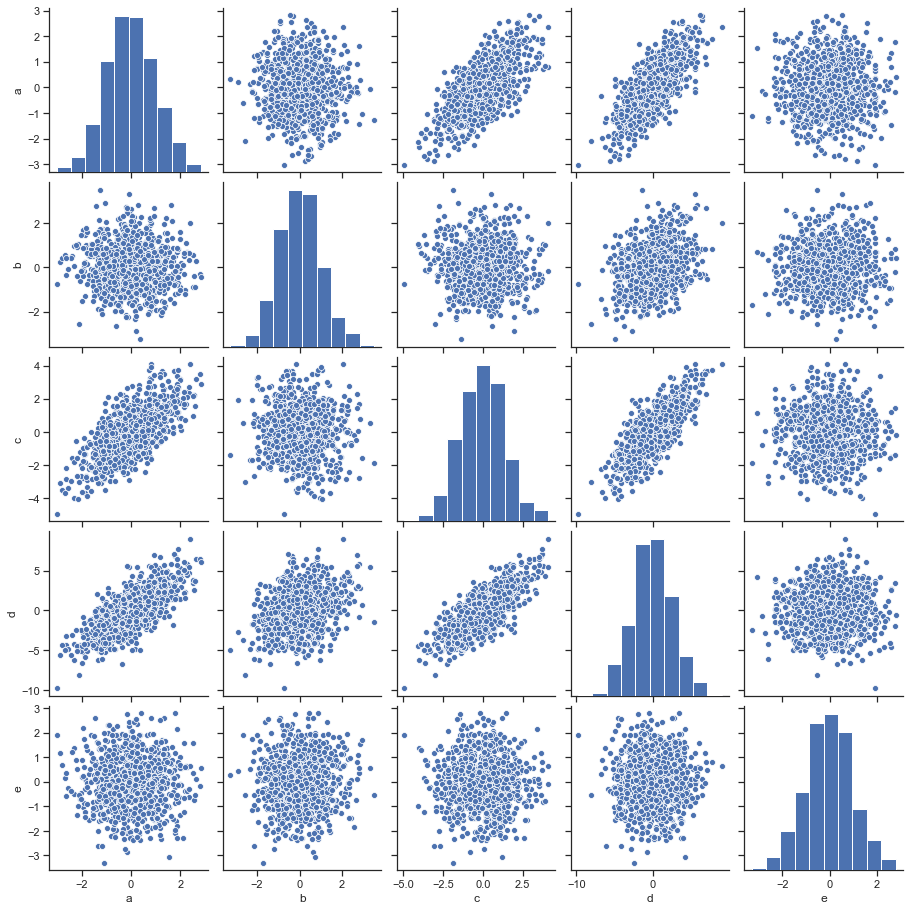

In [11]:
sn.pairplot(df)

#### Test a--b

In [12]:
pg.partial_corr(df,'a','b')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,-0.038,"[-0.1, 0.02]",0.001,-0.001,0.231979,0.081,0.223


In [13]:
pg.partial_corr(df,'a','b','c')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,-0.005,"[-0.07, 0.06]",0.0,-0.002,0.882753,0.04,0.052


In [14]:
pg.partial_corr(df,'a','b',['c','d'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,-0.399,"[-0.45, -0.35]",0.16,0.158,1.363148e-39,1.538e+36,1.0


In [15]:
pg.partial_corr(df,'a','b',['c','d','e'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,-0.399,"[-0.45, -0.35]",0.159,0.158,1.614651e-39,1.3e+36,1.0


In [16]:
# ...and so forth...
# Result: a _||_ b; remove a--b; S=empty set

### Test a-c

In [17]:
pg.partial_corr(df,'a','c')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.703,"[0.67, 0.73]",0.494,0.493,1.349776e-149,5.35e+145,1.0


In [18]:
pg.partial_corr(df,'a','c','e')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.703,"[0.67, 0.73]",0.494,0.493,1.077503e-149,6.698e+145,1.0


In [19]:
pg.partial_corr(df,'a','c',['d','e'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.276,"[0.22, 0.33]",0.076,0.074,5.739765e-19,5.763e+15,1.0


### Test a-e

In [20]:
pg.partial_corr(df,'a','e')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,-0.014,"[-0.08, 0.05]",0.0,-0.002,0.659438,0.044,0.073


In [21]:
# ...and so forth...
# Result: a _||_ e; remove a--e; S=empty set

### Test b-e

In [22]:
pg.partial_corr(df,'b','e')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.03,"[-0.03, 0.09]",0.001,-0.001,0.340783,0.062,0.159


In [23]:
# ...and so forth...
# Result: b _||_ e; remove b--e; S=empty set

In [24]:
# And so forth... In principle, we would need to test all the edges in the graph. 
# To save time, however, we will not go through all the steps here.

### We automatically find the skeleton

To do this we use a modified version of the `pcalg` package. More information about it [here](https://github.com/keiichishima/pcalg/blob/master/pcalg.py)



In [25]:
from scripts.pcalg_mod import * 
from string import ascii_letters

In [26]:
#List of letters (df values)
variables = [x for x in ascii_letters[:5]]

In [27]:
#Estimate the skeleton with significance level 5%
sk = estimate_skeleton(partial_corr_mat,np.matrix(df),0.01)

/Users/jmateosgarcia/anaconda3/envs/causal_ds/lib/python3.6/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


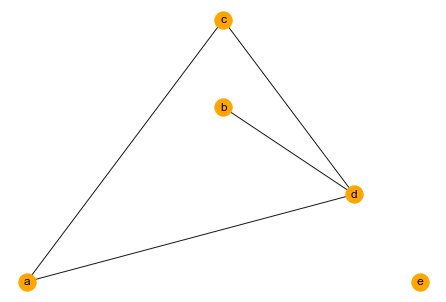

In [28]:
plot_graph(sk[0],variables,layout=nx.planar_layout,labelc='black')

In [30]:
cpdag = estimate_cpdag(sk[0],sk[1])

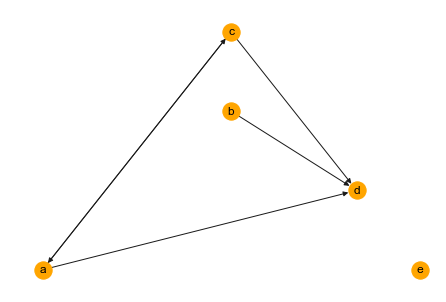

In [31]:
plot_graph(cpdag,variables,layout=nx.planar_layout,labelc='black')

In [32]:
#The graphs are nor as nicely laid out as in the original analysis